In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.graph_objects as go
import matplotlib.pyplot  as plt
import plotly.express as px
from collections import Counter
import re
#import unidecode
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import nltk 
import string     
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

id                            song           artist  \
0   94687                 eternal-eclipse   edge-of-sanity   
1  122833  walk-me-out-in-the-morning-dew    grateful-dead   
2   37976             helping-you-hate-me  bluebottle-kiss   
3   38325                     trailerpark             blur   
4   35331             when-i-see-his-face     blake-babies   

                                              lyrics  \
0  I hate humanity and I will not hesitate to kil...   
1  Walk me out in the mornin' dew my honey\nWalk ...   
2  I know it's a clich\nWhen they say we were doo...   
3  Fist out\nFist out for the five\nFist out\nI'm...   
4  It could be any day now\nIt could be any day\n...   

                                      cleaned_lyrics  genre  
0  I hate humanity I hesitate kill ! There 's hat...  Metal  
1  Walk mornin ' dew honey Walk mornin ' dew toda...   Rock  
2  I know 's clich When say doomed could start We...   Rock  
3  Fist Fist five Fist I 'm country boy I got sou...   Rock  
4  It could day It could day It could day Nothing...   Rock

In [31]:
df.artist.value_counts()

dolly-parton                  581
elton-john                    492
chris-brown                   485
bee-gees                      468
barbra-streisand              443
                             ... 
clara-mae                       1
brothertiger                    1
godspeed-you-black-emperor      1
angus-stone                     1
eerie-summer                    1
Name: artist, Length: 2353, dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
print('Songs : ',len(df.song.unique()))
print('Artist : ',len(df.artist.unique()))
print('lyrics : ',len(df.lyrics.unique()))
print('Genre : ',len(df.genre.unique()))

Songs :  75968
Artist :  2353
lyrics :  92323
Genre :  10


In [29]:
s = df[df['artist']=='dolly-parton']

array(['Country'], dtype=object)

In [4]:
#Code to check the null value counts
Null = pd.DataFrame(df.isnull().sum())

In [5]:
Null.reset_index(inplace=True)

In [6]:
Null

index   0
0              id   0
1            song  58
2          artist  63
3          lyrics  64
4  cleaned_lyrics  65
5           genre  65

In [13]:
Null = Null.rename({'index':'Fields',0:'Count'},axis = 'columns')

In [14]:
Null

Fields  Count
0              id      0
1            song     58
2          artist     63
3          lyrics     64
4  cleaned_lyrics     65
5           genre     65

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

id                0
song              0
artist            0
lyrics            0
cleaned_lyrics    0
genre             0
dtype: int64

In [17]:
#Bar plot showing the count of null values
fig = px.bar(Null, x='Fields', y='Count',color='Fields',text = 'Count')
fig.show()

In [18]:
#Checking the number of genres
Genre_counts = df.genre.value_counts()

In [19]:
Genre_counts = pd.DataFrame(Genre_counts)
Genre_counts.reset_index(inplace = True)

In [20]:
Genre_counts.head()

index  genre
0     Rock  51846
1      Pop  14955
2    Metal   9031
3  Hip-Hop   7094
4  Country   5988

In [21]:
#Genre_counts.drop('level_0',inplace=True,axis = 1)
#Genre_counts.drop('Genre',inplace=True,axis = 1)
Genre_counts = Genre_counts.rename({'index':'Genre','genre':'Count'},axis = 'columns')
Genre_counts.head()

Genre  Count
0     Rock  51846
1      Pop  14955
2    Metal   9031
3  Hip-Hop   7094
4  Country   5988

In [23]:
#Rock dominates the entire dataset
fig = px.bar(Genre_counts, y='Count', x='Genre', text='Count',color='Genre')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

In [ ]:
df.head()

In [ ]:
#Checking the most number of keywords in disaster tweets
r = Counter(df['artist'])
r = dict(r.most_common())
r_count = list(r.values())
print(r_count[0:4])
r_values = list(r.keys())
print(r_values[0:10])

In [ ]:
artist_keys = pd.DataFrame(r_values[0:20],columns = ['Artist_Name'])
artist_values = pd.DataFrame(r_count[0:20],columns = ['Count'])
artist = pd.concat([artist_keys,artist_values],axis=1)

In [ ]:
artist.to_excel('Artist.xlsx')

In [62]:
#Words
df['length'] = df.lyrics.str.len()
df_group = df.groupby(by = 'genre').mean()

In [63]:
df_group.reset_index(inplace=True)

In [64]:
df_group

genre            id       length  char_count
0     Country  70351.985972   942.088176  190.925017
1  Electronic  66406.282570  1015.302377  203.813820
2        Folk  61973.680000  1112.169412  220.905882
3     Hip-Hop  70341.358331  2667.826050  529.409924
4       Indie  62534.246512   964.653023  194.611163
5        Jazz  74262.787425   831.585030  167.035928
6       Metal  64050.692725   987.496069  188.783302
7         Pop  55061.936744  1240.142093  252.795988
8         R&B  42994.403966  1149.749575  233.666856
9        Rock  63058.020252   998.487019  199.899144

In [ ]:
df_group.to_excel('Genre_Length_words-new.xlsx')

In [55]:
df['char_count'] = df['lyrics'].apply(lambda x : len(str(x).split()))

In [61]:
s = 'adwait'
s.split()

['adwait']

In [56]:
df.head()

id                            song           artist  \
0   94687                 eternal-eclipse   edge-of-sanity   
1  122833  walk-me-out-in-the-morning-dew    grateful-dead   
2   37976             helping-you-hate-me  bluebottle-kiss   
3   38325                     trailerpark             blur   
4   35331             when-i-see-his-face     blake-babies   

                                              lyrics  \
0  I hate humanity and I will not hesitate to kil...   
1  Walk me out in the mornin' dew my honey\nWalk ...   
2  I know it's a clich\nWhen they say we were doo...   
3  Fist out\nFist out for the five\nFist out\nI'm...   
4  It could be any day now\nIt could be any day\n...   

                                      cleaned_lyrics  genre  length  \
0  I hate humanity I hesitate kill ! There 's hat...  Metal     209   
1  Walk mornin ' dew honey Walk mornin ' dew toda...   Rock     143   
2  I know 's clich When say doomed could start We...   Rock     122   
3  Fist Fist five Fist I 'm country boy I got sou...   Rock     113   
4  It could day It could day It could day Nothing...   Rock     122   

   char_count  
0         209  
1         143  
2         122  
3         113  
4         122

In [ ]:
df_group_char = df.groupby(by = 'genre').mean()
df_group_char.reset_index(inplace=True)

In [ ]:
df_group_char.to_excel('Genre_char_count.xlsx')

In [ ]:
from textblob import TextBlob
df['polarity'] = df['lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df.head()

In [ ]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

df['polarity'] = df['polarity'].apply(lambda x: sentiment(x))

In [ ]:
df.head()

In [ ]:
sent = df.polarity.value_counts()
sent = pd.DataFrame(sent)
sent.reset_index(inplace = True)

In [ ]:
sent.head()

In [ ]:
sent = sent.rename({'index':'Sentiment','polarity':'Polarity Count'},axis = 'columns')

In [ ]:
sb.barplot(x = 'Sentiment',y = 'Polarity Count',data = sent)

In [ ]:
df.head()

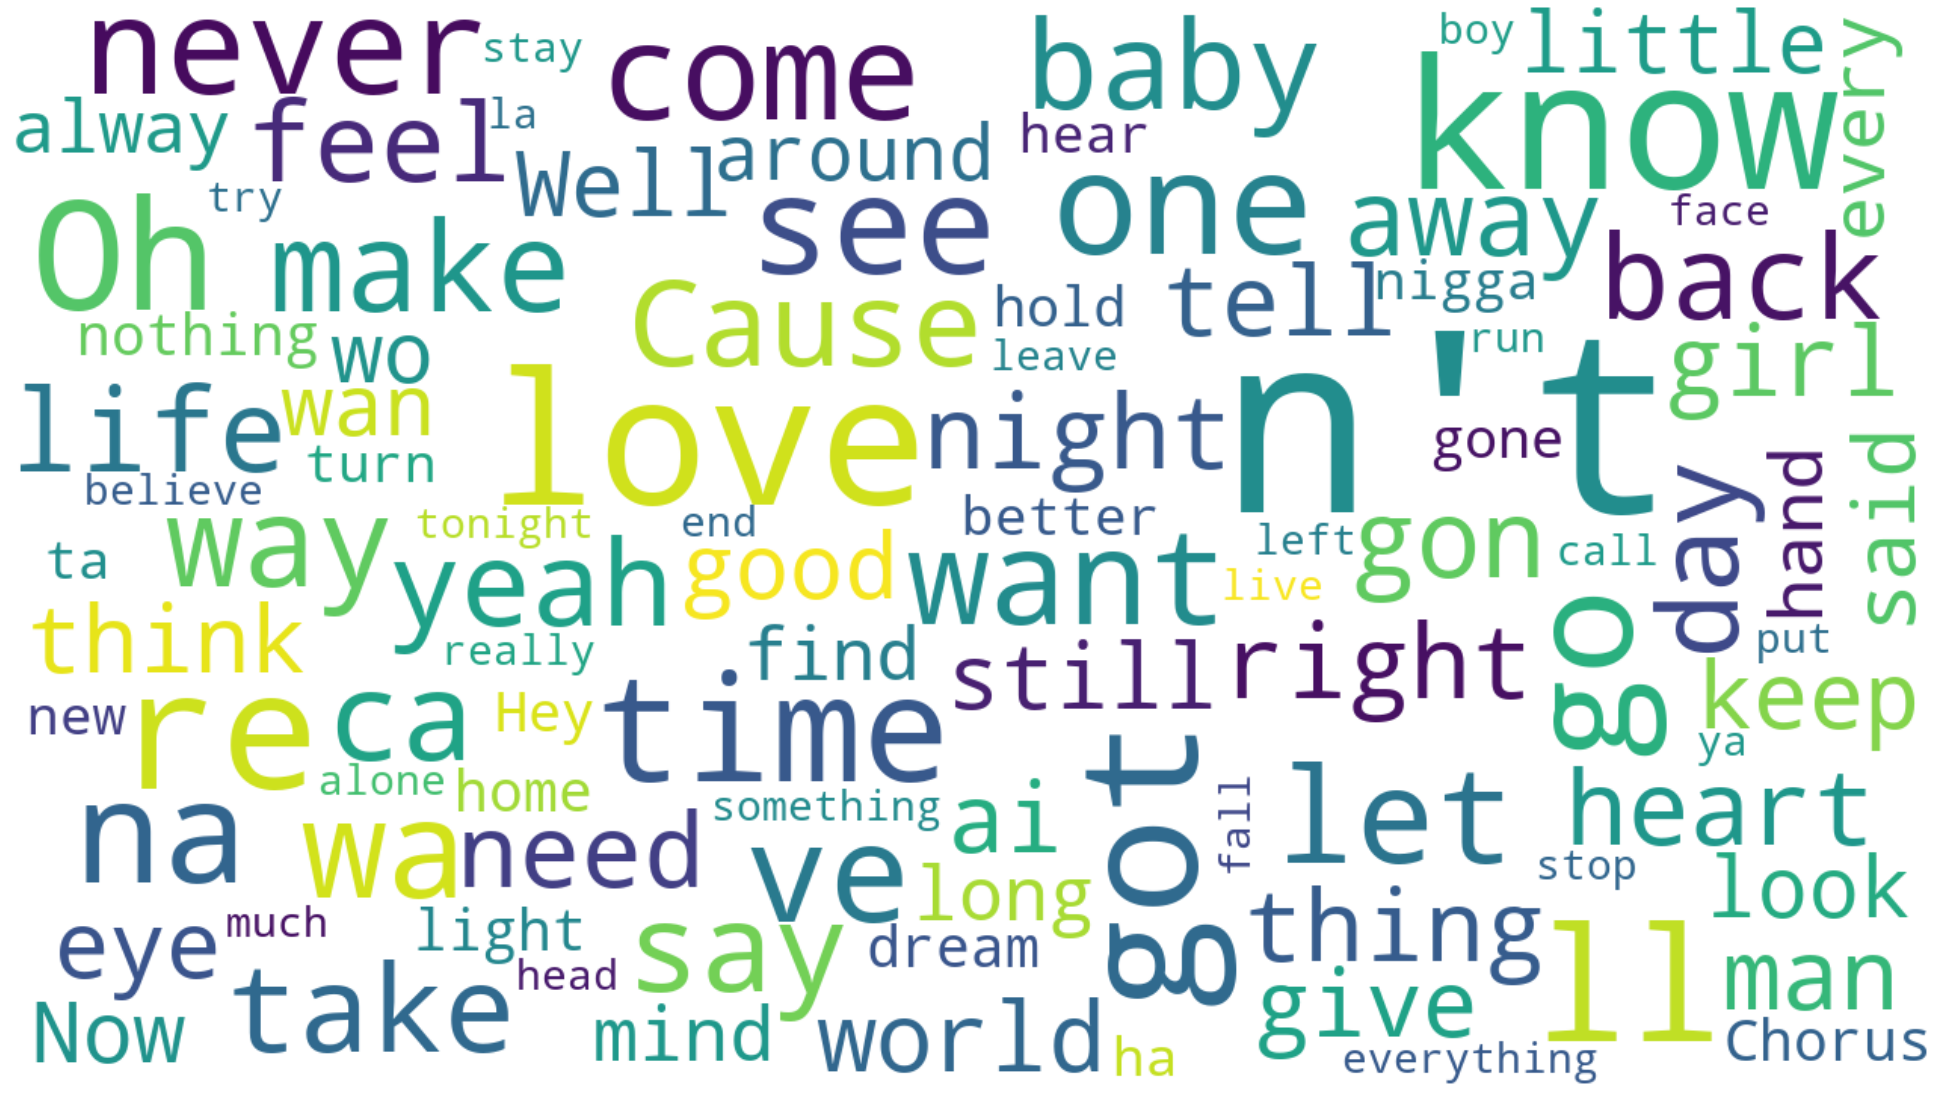

In [66]:
#Generating word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
mask = np.array(Image.open('Thank_you.jpg'))

normal_words = ' '.join([word for word in df['cleaned_lyrics']])
wc = WordCloud(background_color="white", max_words=100, mask=mask,collocations=False)
wc.generate(normal_words)
plt.figure(figsize= (40,20))
plt.imshow(wc, interpolation='bilinear')
#plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

In [ ]:
#Generating word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
#mask = np.array(Image.open('mus.jpg'))

normal_words = ' '.join([word for word in df['genre']])
wc = WordCloud(background_color="white", max_words=100,collocations=False)
wc.generate(normal_words)
plt.figure(figsize= (40,20))
plt.imshow(wc, interpolation='bilinear')
#plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()